In [43]:
# Dependencies
import openweathermapy.core as ow
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests as req
import os
import time
from secrets import API_KEY

In [44]:
# Create random latitudes from -90 to 90
world_city_lat = np.random.uniform(low=-90.0, high=90.0, size=(20,))
world_city_lat = np.round( [float(i) for i in world_city_lat], 2)
world_city_lat


array([ 68.29,  72.82,   6.7 , -87.88,  68.42, -82.93,   0.22,  -9.88,
        21.64, -77.27,  34.75,  51.1 , -89.4 , -44.65,  13.11, -21.84,
        82.28,   8.65,  -5.77,  83.52])

In [45]:
# Create random longitudes from -180 to 180
world_city_lon = np.random.uniform(low=-180.0, high=180.0, size=(20,))
world_city_lon = np.round( [float(i) for i in world_city_lon], 2)
world_city_lon

array([-115.94,  -17.91,    9.46,  138.72, -146.89,  -58.41,  -81.97,
         46.42,   87.41, -101.23,  166.32,  179.43,  -50.21,   17.23,
         35.98, -131.52, -158.  ,  164.51,  -35.37,  -55.82])

In [46]:
# Save config information.
#print (API_KEY)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [47]:
# create a list of lat lon tuples 

array([[  68.29, -115.94],
       [  72.82,  -17.91],
       [   6.7 ,    9.46],
       [ -87.88,  138.72],
       [  68.42, -146.89],
       [ -82.93,  -58.41],
       [   0.22,  -81.97],
       [  -9.88,   46.42],
       [  21.64,   87.41],
       [ -77.27, -101.23],
       [  34.75,  166.32],
       [  51.1 ,  179.43],
       [ -89.4 ,  -50.21],
       [ -44.65,   17.23],
       [  13.11,   35.98],
       [ -21.84, -131.52],
       [  82.28, -158.  ],
       [   8.65,  164.51],
       [  -5.77,  -35.37],
       [  83.52,  -55.82]])

In [48]:
cities = []
for coordinate_pair in world_city_latlons:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
candidate_cities = []
for city in cities:
    if city not in candidate_cities:
        candidate_cities.append(city.city_name)
candidate_cities
    



['yellowknife',
 'illoqqortoormiut',
 'wum',
 'hobart',
 'fairbanks',
 'ushuaia',
 'manta',
 'domoni',
 'digha',
 'punta arenas',
 'severo-kurilsk',
 'beringovskiy',
 'ushuaia',
 'hermanus',
 'doka',
 'rikitea',
 'barrow',
 'butaritari',
 'sao goncalo do amarante',
 'upernavik']

In [49]:
query_url = url + "appid=" + API_KEY + "&units=" + units + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q='

In [50]:
weather_data = []

In [51]:
for city in candidate_cities:
    time.sleep(.5)
    weather_data.append(req.get(query_url + city).json())
    print (query_url+city)
weather_data[4]

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=wum
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hobart
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=manta
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=domoni
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=di

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 64.84, 'lon': -147.72},
 'dt': 1520118180,
 'id': 5861897,
 'main': {'humidity': 92,
  'pressure': 1025,
  'temp': 14.59,
  'temp_max': 15.8,
  'temp_min': 14},
 'name': 'Fairbanks',
 'sys': {'country': 'US',
  'id': 63,
  'message': 0.0036,
  'sunrise': 1520095720,
  'sunset': 1520133468,
  'type': 1},
 'visibility': 4828,
 'weather': [{'description': 'light snow',
   'icon': '13d',
   'id': 600,
   'main': 'Snow'},
  {'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 260, 'speed': 4.7}}

In [52]:
weather_data

[{'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 62.45, 'lon': -114.38},
  'dt': 1520118000,
  'id': 6185377,
  'main': {'humidity': 71,
   'pressure': 1032,
   'temp': 5,
   'temp_max': 5,
   'temp_min': 5},
  'name': 'Yellowknife',
  'sys': {'country': 'CA',
   'id': 3558,
   'message': 0.0038,
   'sunrise': 1520087449,
   'sunset': 1520125730,
   'type': 1},
  'visibility': 24140,
  'weather': [{'description': 'few clouds',
    'icon': '02d',
    'id': 801,
    'main': 'Clouds'}],
  'wind': {'deg': 150, 'speed': 6.93}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 6.39, 'lon': 10.08},
  'dt': 1520119627,
  'id': 2221053,
  'main': {'grnd_level': 922.11,
   'humidity': 61,
   'pressure': 922.11,
   'sea_level': 1022.35,
   'temp': 56.34,
   'temp_max': 56.34,
   'temp_min': 56.34},
  'name': 'Wum',
  'sys': {'country': 'CM',
   'message': 0.0039,
   'sunrise': 1520055059,
  

In [55]:
# Extract latitude and temperature from json
l_data = [d.get("coord").get("lat") for d in weather_data]
t_data = [d.get("main").get("temp") for d in weather_data]
h_data = [d.get('main').get('humidity') for d in weather_data]
w_data = [d.get('wind').get('speed') for d in weather_data]
c_data = [d.get('clouds').get('all') for d in weather_data]


AttributeError: 'NoneType' object has no attribute 'get'

In [54]:
lattemp_data = {"temp": t_data, "lat": l_data}
lattemp_data = pd.DataFrame(lattemp_data)
lattemp_data

NameError: name 't_data' is not defined

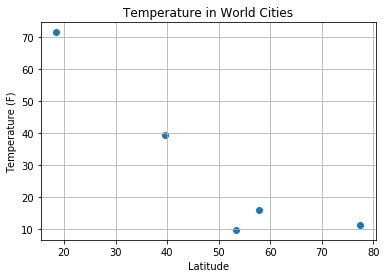

In [253]:
# Build a scatter plot for each data type
plt.scatter(lattemp_data["lat"], lattemp_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureinWorldCities.png")

# Show plot
plt.show()

In [254]:
# Extract latitude and humidity from json
l_data = [d.get("coord").get("lat") for d in weather_data]
h_data = [d.get("main").get("humidity") for d in weather_data]

lathumidity_data = {"humidity": h_data, "lat": l_data}
lathumidity_data = pd.DataFrame(lathumidity_data)
lathumidity_data

AttributeError: 'NoneType' object has no attribute 'get'

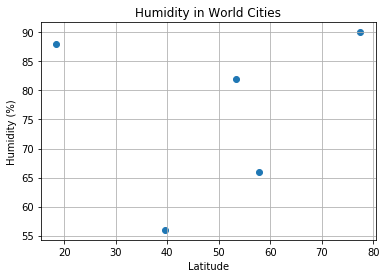

In [255]:
# Build a scatter plot for each data type
plt.scatter(lathumidity_data["lat"], lathumidity_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityinWorldCities.png")

# Show plot
plt.show()

In [256]:
# Extract latitude and cloudiness from json
l_data = [d.get("coord").get("lat") for d in weather_data]
c_data = [d.get("clouds").get("all") for d in weather_data]

latclouds_data = {"all": c_data, "lat": l_data}
latclouds_data = pd.DataFrame(latclouds_data)
latclouds_data

AttributeError: 'NoneType' object has no attribute 'get'

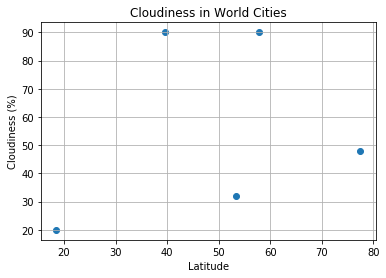

In [257]:
# Build a scatter plot for each data type
plt.scatter(latclouds_data["lat"], latclouds_data["all"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessinWorldCities.png")

# Show plot
plt.show()

In [258]:
# Extract latitude and winds from json
l_data = [d.get("coord").get("lat") for d in weather_data]
w_data = [d.get("wind").get("speed") for d in weather_data]

latwind_data = {"speed": w_data, "lat": l_data}
latwind_data = pd.DataFrame(latwind_data)
latwind_data

AttributeError: 'NoneType' object has no attribute 'get'

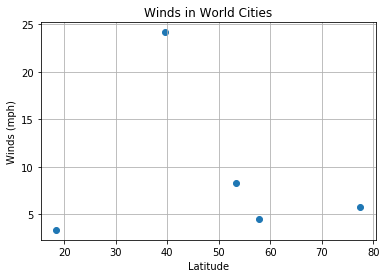

In [259]:
# Build a scatter plot for each data type
plt.scatter(latwind_data["lat"], latwind_data["speed"], marker="o")

# Incorporate the other graph properties
plt.title("Winds in World Cities")
plt.ylabel("Winds (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindsinWorldCities.png")

# Show plot
plt.show()